In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


In [3]:
# read the data set

In [4]:
df=pd.read_csv("height-weight.csv")

In [5]:
df

,Weight,Height
0,45,120
1,58,135
2,48,123
3,60,145
4,70,160
5,78,162
6,80,163
7,90,175
8,95,182
9,78,170


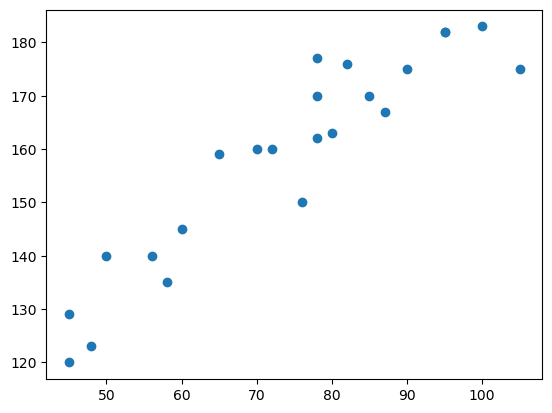

In [6]:
plt.scatter(df.Weight,df.Height)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23 entries, 0 to 22
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Weight  23 non-null     int64
 1   Height  23 non-null     int64
dtypes: int64(2)
memory usage: 496.0 bytes


In [8]:
df.describe()

,Weight,Height
count,23.000000,23.000000
mean,73.826087,158.391304
std,17.872407,19.511626
min,45.000000,120.000000
25%,59.000000,142.500000
50%,78.000000,162.000000
75%,86.000000,175.000000
max,105.000000,183.000000


In [9]:
df.isna().sum()

Weight    0
Height    0
dtype: int64

In [10]:
# divide our data set into dependent and independent features

In [11]:
x=df[['Weight']]

In [12]:
y=df['Height']

In [13]:
y.shape

(23,)

In [14]:
x.shape

(23, 1)

In [15]:
#Divide the dataset into train and test

In [16]:
from sklearn.model_selection import train_test_split

In [17]:
X_train, X_test, y_train, y_test=train_test_split(x,y,test_size=0.20,random_state=42)

In [18]:
X_train

,Weight
12,105
1,58
13,100
5,78
2,48
11,95
20,45
3,60
4,70
18,76


In [19]:
y_train

12    175
1     135
13    183
5     162
2     123
11    182
20    129
3     145
4     160
18    150
16    140
21    140
22    160
7     175
10    176
14    170
19    167
6     163
Name: Height, dtype: int64

In [20]:
X_test

,Weight
15,78
9,78
0,45
8,95
17,65


In [21]:
y_test

15    177
9     170
0     120
8     182
17    159
Name: Height, dtype: int64

In [22]:
#Srandard scaling on the train and test data

In [23]:
from sklearn.preprocessing import StandardScaler

In [24]:
s=StandardScaler()

In [25]:
X_train=s.fit_transform(X_train)

In [26]:
X_test=s.transform(X_test)

In [27]:
X_test

array([[ 0.21043706],
       [ 0.21043706],
       [-1.6552288 ],
       [ 1.17153765],
       [-0.52452222]])

In [28]:
X_train

array([[ 1.73689094],
       [-0.92026952],
       [ 1.4542143 ],
       [ 0.21043706],
       [-1.48562281],
       [ 1.17153765],
       [-1.6552288 ],
       [-0.80719886],
       [-0.24184557],
       [ 0.0973664 ],
       [-1.37255215],
       [-1.03334018],
       [-0.12877492],
       [ 0.88886101],
       [ 0.43657837],
       [ 0.60618436],
       [ 0.71925502],
       [ 0.32350772]])

In [29]:
y

0     120
1     135
2     123
3     145
4     160
5     162
6     163
7     175
8     182
9     170
10    176
11    182
12    175
13    183
14    170
15    177
16    140
17    159
18    150
19    167
20    129
21    140
22    160
Name: Height, dtype: int64

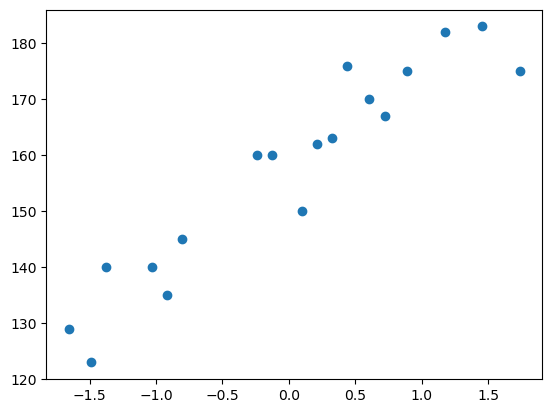

In [30]:
plt.scatter(X_train,y_train)

In [31]:
#Model TRaining

In [32]:
from sklearn.linear_model import LinearRegression

In [33]:
regressor=LinearRegression()

In [34]:
#Trining the train data
regressor.fit(X_train,y_train)

LinearRegression()

In [35]:
regressor.intercept_

157.5

In [36]:
regressor.coef_

array([17.03440872])

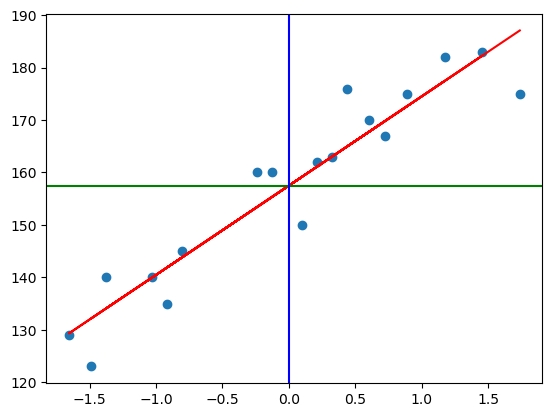

In [37]:
plt.scatter(X_train,y_train)
plt.plot(X_train,regressor.predict(X_train),'r')
plt.axhline(y=regressor.intercept_,  color='green') #intercept
plt.axvline(x=0,  color='blue')  #intercept


In [38]:
#Cost function
from sklearn.metrics import mean_absolute_error


In [46]:
y_pred=regressor.predict(X_train)
mae=mean_absolute_error(y_train,y_pred)
mae

4.481059846260251

In [40]:
#Prediction

In [41]:
y_pred_test=regressor.predict(X_test)
y_pred_test

array([161.08467086, 161.08467086, 129.3041561 , 177.45645118,
       148.56507414])

In [42]:
y_test

15    177
9     170
0     120
8     182
17    159
Name: Height, dtype: int64

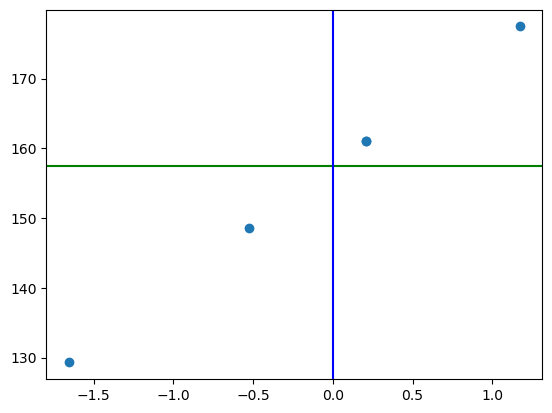

In [43]:
plt.scatter(X_test,y_pred_test)
plt.axhline(y=regressor.intercept_,  color='green') #intercept
plt.axvline(x=0,  color='blue')  #intercept


In [44]:
# Permormance 

In [45]:
from sklearn.metrics import mean_absolute_error,mean_squared_error

In [46]:
mse=mean_squared_error(y_test,y_pred_test);
mae=mean_absolute_error(y_test,y_pred_test);
rmse=np.sqrt(mse)

print(f'MSE={mse} , MAE= {mae} ,RMSE = {rmse} ')

MSE=109.77592599051664 , MAE= 9.822657814519232 ,RMSE = 10.477400726827081 


In [49]:
# Accurracy

#1). R-squared

from sklearn.metrics import  r2_score

score=r2_score(y_test,y_pred_test)
score



0.776986986042344

In [ ]:
#2).Adjusted R square

1-(1-score)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)